# Spam Detection Analysis

In this Jupyter notebook, we will perform a spam detection analysis on a dataset containing SMS messages labeled as spam or not spam. The dataset contains four columns, but we will only use the columns v1 (label: spam or not spam) and v2 (the SMS message).

## Dataset

The dataset we will be using is the [SMS Spam Collection](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/code?resource=download), which contains 5,574 SMS messages labeled as spam or not spam. The dataset can be downloaded from the UCI Machine Learning Repository.

In [107]:
import pandas as pd

df = pd.read_csv('data/spam.csv', encoding='ISO-8859-1')


print("Columns in the dataset:", df.columns.tolist())

print("\nShape of the dataset:", df.shape)


Columns in the dataset: ['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

Shape of the dataset: (5572, 5)


## Data Cleaning
1. Understanding the columns

We have 5 columns in this dataset where three of them seem to have only nan

In [108]:
display(df.head(5))

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


But in the columns with nans also have lines with values, let's investigate it

In [109]:
print('Count of nan values:\n', df.isna().sum())

Count of nan values:
 v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


Showing the values in the nan columns

In [110]:
print('\nNot nans in the Unnamed: 2')
display(df[~df['Unnamed: 2'].isna()].head(5))

print('\nNot nans in the Unnamed: 3')
display(df[~df['Unnamed: 3'].isna()].head(5))

print('\nNot nans in the Unnamed: 4')
display(df[~df['Unnamed: 4'].isna()].head(5))


Not nans in the Unnamed: 2


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
710,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN



Not nans in the Unnamed: 3


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
899,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
2170,ham,\CAN I PLEASE COME UP NOW IMIN TOWN.DONTMATTER...,JUST REALLYNEED 2DOCD.PLEASE DONTPLEASE DONTIG...,"U NO THECD ISV.IMPORTANT TOME 4 2MORO\""""",NaN



Not nans in the Unnamed: 4


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
2255,ham,I just lov this line: \Hurt me with the truth,I don't mind,i wil tolerat.bcs ur my someone..... But,"Never comfort me with a lie\"" gud ni8 and swe..."
3525,ham,\HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DE...,HAD A COOL NYTHO,TX 4 FONIN HON,"CALL 2MWEN IM BK FRMCLOUD 9! J X\"""""
4668,ham,"When I was born, GOD said, \Oh No! Another IDI...",GOD said,"\""OH No! COMPETITION\"". Who knew","one day these two will become FREINDS FOREVER!"""


The first impression is that some of the text appears to have been broken into columns. Let's see a sample

In [111]:
full_message_281 = df.loc[[281]]
full_message_281['full_message_281'] = full_message_281['v2']+full_message_281['Unnamed: 2']+full_message_281['Unnamed: 3']+full_message_281['Unnamed: 4']
print(full_message_281.iloc[0,5])

\Wen u miss someone the person is definitely special for u..... But if the person is so special why to miss them just Keep-in-touch\" gdeve.."


As we can see the unnamed column contains values ​​that can be joined to v2 to complete the sentences. Let's join it

In [112]:
# Concatenate the strings in the v2 column with the non-null values in the Unnamed columns
df['concated_sentence'] = df['v2'].fillna('') + df['Unnamed: 2'].fillna('') + df['Unnamed: 3'].fillna('') + df['Unnamed: 4'].fillna('')

Now we can use only the columns that is important to us, and rename them

In [118]:
df = df[['concated_sentence', 'v1']]
df.columns = ['sentences','target']

2. Cleaning the sentences and understanding the data

First let's investigate the distribuition of our data

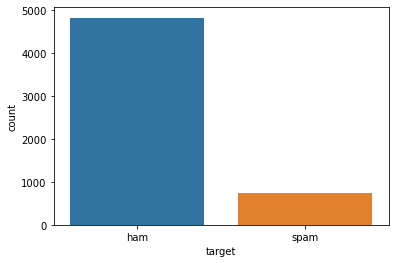

In [126]:
import seaborn as sns

sns.countplot(x='target', data=df);

We have more ham messages than spam messages, it's a bad signal, because our dataset is unbalanced and it can prejudice some analysis and machine learning models.

In [128]:
print('Total duplicated:', df.duplicated().sum())

print('Total spam duplicated:', df[df['target']=='spam'].duplicated().sum())

print('Total ham duplicated:', df[df['target']=='ham'].duplicated().sum())

Total duplicated: 403
Total spam duplicated: 94
Total ham duplicated: 309


And also we have some duplicated data, that decrease even more our spam target, let's remove it

In [129]:
df = df.drop_duplicates()

Now let's clean up our texts, standardizing them, removing abbreviations and putting everything in lowercase

In [136]:
df['sentences'] = df['sentences'].str.lower()

C:\Users\lfroes\AppData\Local\Temp\ipykernel_8984\204684015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentences'] = df['sentences'].str.lower()


In [131]:
import re

def expand_contractions(text):
    # Define a dictionary of contractions and their expansions
    contractions = {
        "ain't": "am not",
        "aren't": "are not",
        "can't": "cannot",
        "couldn't": "could not",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'll": "he will",
        "he's": "he is",
        "i'd": "I would",
        "i'll": "I will",
        "i'm": "I am",
        "i've": "I have",
        "isn't": "is not",
        "it's": "it is",
        "let's": "let us",
        "mightn't": "might not",
        "mustn't": "must not",
        "shan't": "shall not",
        "she'd": "she would",
        "she'll": "she will",
        "she's": "she is",
        "shouldn't": "should not",
        "that's": "that is",
        "there's": "there is",
        "they'd": "they would",
        "they'll": "they will",
        "they're": "they are",
        "they've": "they have",
        "we'd": "we would",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "where's": "where is",
        "who'd": "who would",
        "who'll": "who will",
        "who're": "who are",
        "who's": "who is",
        "who've": "who have",
        "won't": "will not",
        "wouldn't": "would not",
        "you'd": "you would",
        "you'll": "you will",
        "you're": "you are",
        "you've": "you have"
    }
    
    # Create a regular expression pattern to match the contractions
    pattern = re.compile(r'\b(' + '|'.join(contractions.keys()) + r')\b')
    
    # Replace the contractions with their expansions
    expanded_text = pattern.sub(lambda match: contractions[match.group(0)], text)
    
    return expanded_text

In [137]:
df['sentences'] = df['sentences'].apply(expand_contractions)

C:\Users\lfroes\AppData\Local\Temp\ipykernel_8984\818087731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentences'] = df['sentences'].apply(expand_contractions)


3. Now let's create the dataset for our EDA ideas

## Exploratory Data Analysis

* The lenght of the message is important to classify the sentence ?
* The punctuations is important ?
* Which words that appear most in each type of message 
* N-grams

In [5]:
from sklearn.utils import resample

# Separate the majority and minority classes
majority_df = df[df['v1'] == 'ham']
minority_df = df[df['v1'] == 'spam']

# Determine the size of the minority class
minority_size = len(minority_df)

# Undersample the majority class to the size of the minority class
undersampled_majority_df = resample(majority_df, replace=False, n_samples=minority_size, random_state=42)

# Combine the minority and undersampled majority classes
balanced_df = pd.concat([minority_df, undersampled_majority_df])

# Shuffle the rows of the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42)

In [6]:
balanced_df['lenght_msg'] = balanced_df['v2'].apply(lambda x: len(x))

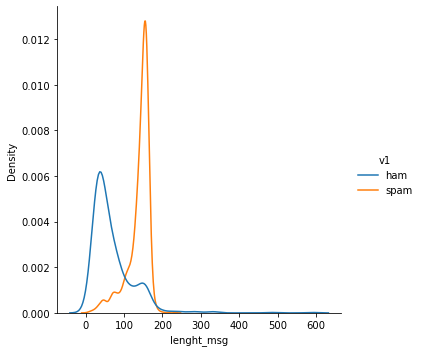

In [7]:
sns.displot(x='lenght_msg', data=balanced_df, hue='v1', kind='kde');

In [8]:
balanced_df.groupby('v1').describe()

lenght_msg                                                         
          count        mean        std   min    25%    50%    75%    max
v1                                                                      
ham       747.0   69.117805  54.961157   3.0   33.0   51.0   86.0  588.0
spam      747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

In [10]:
import string

punctuations = string.punctuation

In [13]:
# Initialize counts for each punctuation mark
spam_counts = {p: 0 for p in punctuations}
ham_counts = {p: 0 for p in punctuations}

# Loop over each message in the DataFrame
for idx, row in balanced_df.iterrows():
    message = row['v2']
    target = row['v1']
    
    # Count the punctuation marks in the message
    for p in punctuations:
        count = message.count(p)
        
        # Add the count to the appropriate dictionary based on the target
        if target == 'spam':
            spam_counts[p] += count
        else:
            ham_counts[p] += count



In [14]:
ham_punct_df = pd.DataFrame.from_dict(ham_counts, orient='index', columns=['ham_count'])
spam_punct_df = pd.DataFrame.from_dict(spam_counts, orient='index', columns=['spam_count'])

punct_df = ham_punct_df.join(spam_punct_df, how='outer')


In [15]:
punct_df = punct_df.sort_values(by=['ham_count', 'spam_count'], ascending=False)

In [16]:
punct_df

,ham_count,spam_count
.,1372,1560
",",219,405
?,211,174
!,133,542
&,111,178
;,111,2
:,88,179
),73,65
',65,79
-,44,247


In [17]:
import matplotlib.pyplot as plt

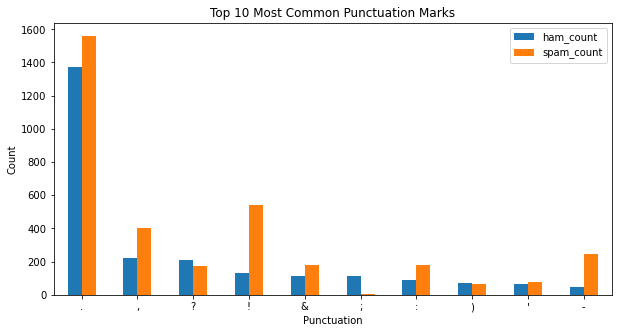

In [18]:
# Plot a bar chart of the top 10 most common punctuation marks
top_punct_df = punct_df.head(10)
ax = top_punct_df.plot(kind='bar', figsize=(10, 5), rot=0)
ax.set_xlabel('Punctuation')
ax.set_ylabel('Count')
ax.set_title('Top 10 Most Common Punctuation Marks')
plt.show()

In [19]:
spam_msgs = balanced_df[balanced_df['v1']=='spam']
spam_msgs[spam_msgs['v2'].str.contains('!')].sample(5)

,v1,v2,lenght_msg
4600,spam,freemsg: txt: call to no: 86888 & claim your r...,144
1639,spam,freemsg:feelin kinda lnly hope u like 2 keep m...,160
3677,spam,promotion number: 8714714 - ur awarded a city ...,179
2582,spam,3 free tarot texts! find out about your love l...,131
4832,spam,"new mobiles from 2004, must go! txt: nokia to ...",153


In [20]:
translator = str.maketrans('', '', string.punctuation)
balanced_df['v2'] = balanced_df['v2'].apply(lambda x: x.translate(translator))

balanced_df

,v1,v2,lenght_msg
270,ham,come to mu we are sorting out our narcotics si...,53
4923,ham,we can go 4 e normal pilates after our intro,49
4598,ham,have you laid your airtel line to rest,39
5093,ham,gokila is talking with you aha,32
2775,ham,we confirm eating at esplanade,31
...,...,...,...
589,ham,I am in a meeting call me later at,34
2624,ham,s daal r above ltgt,27
2989,ham,love is not a decision it is a feeling if we c...,126
1825,ham,wat makes some people dearer is not just de ha...,119


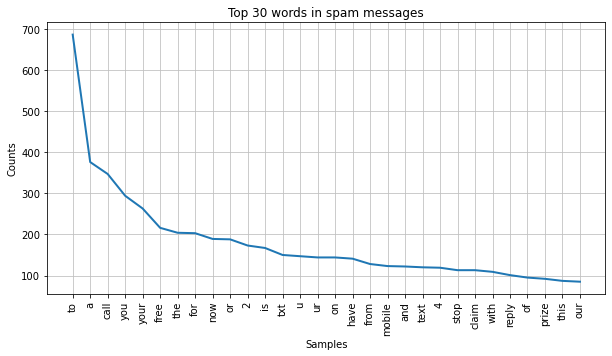

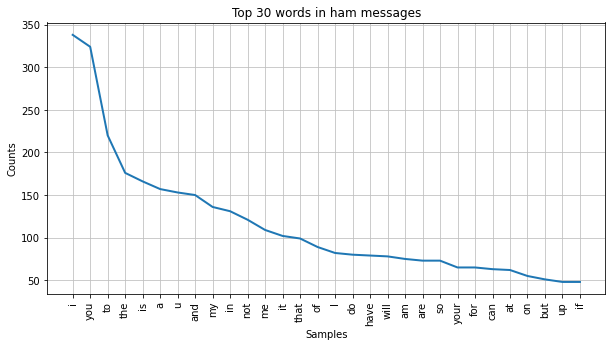

In [21]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

balanced_df['tokens'] = balanced_df['v2'].apply(word_tokenize)

fdist_spam = FreqDist([word for tokens in balanced_df[balanced_df['v1'] == 'spam']['tokens'] for word in tokens])
fdist_ham = FreqDist([word for tokens in balanced_df[balanced_df['v1'] == 'ham']['tokens'] for word in tokens])

plt.figure(figsize=(10, 5))
fdist_spam.plot(30, cumulative=False, title='Top 30 words in spam messages')
plt.show()

plt.figure(figsize=(10, 5))
fdist_ham.plot(30, cumulative=False, title='Top 30 words in ham messages')
plt.show()

In [27]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

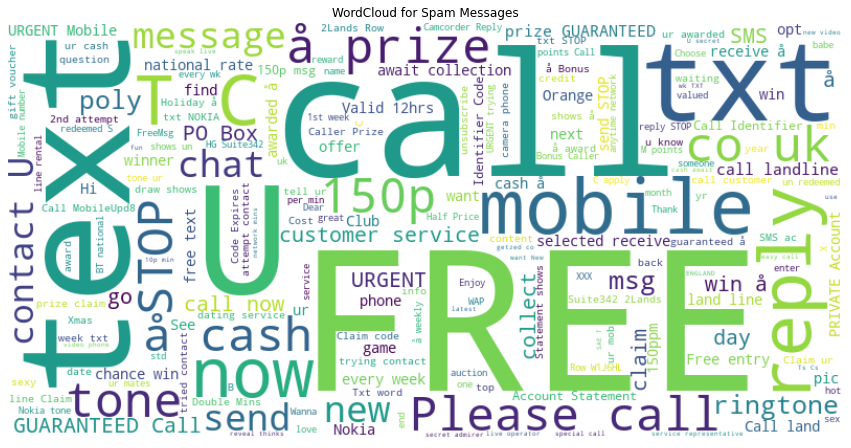

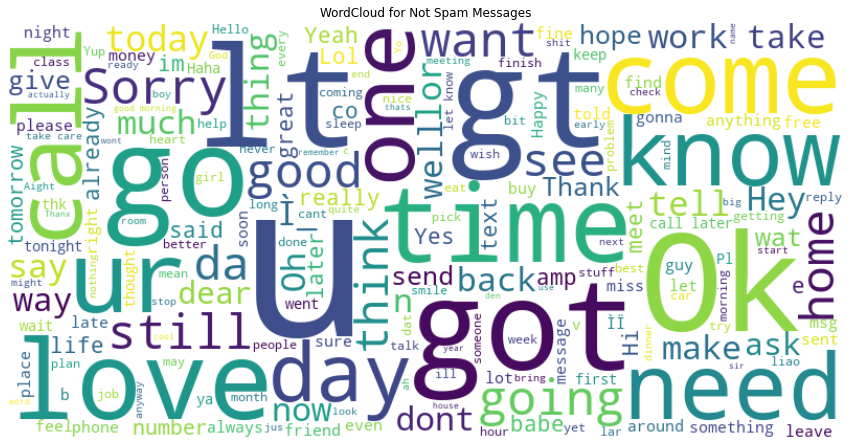

In [29]:
# Split the text into spam and not spam messages
spam_text = ' '.join(df[df['v1'] == 'spam']['v2'])
ham_text = ' '.join(df[df['v1'] == 'ham']['v2'])

# Remove stopwords from the text
stop_words = set(stopwords.words('english'))
spam_text = ' '.join([word for word in spam_text.split() if word.lower() not in stop_words])
ham_text = ' '.join([word for word in ham_text.split() if word.lower() not in stop_words])

# Create a WordCloud object for spam messages
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

# Create a WordCloud object for not spam messages
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

# Plot the WordCloud for spam messages
plt.figure(figsize=(15, 8))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Spam Messages')
plt.show()

# Plot the WordCloud for not spam messages
plt.figure(figsize=(15, 8))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Not Spam Messages')
plt.show()

In [30]:
from nltk import ngrams
from collections import Counter

In [33]:
tokens = spam_text.split()

n = 2

bigrams = ngrams(tokens, n)


In [35]:
bigram_freq = Counter(bigrams)


In [36]:
print(bigram_freq.most_common(10))


[(('Please', 'call'), 26), (('å£1000', 'cash'), 19), (('prize', 'GUARANTEED.'), 19), (('GUARANTEED.', 'Call'), 19), (('2', 'claim'), 17), (('PO', 'Box'), 17), (('Valid', '12hrs'), 16), (('Account', 'Statement'), 16), (('land', 'line.'), 16), (('call', 'customer'), 15)]
